# Taming Text

In this homework we will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy.

In [3]:
#A few dependecies are needed:
import numpy as np
import pickle

import pandas as pd
import seaborn
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the data:

In [4]:
data_dir = 'hillary-clinton-emails/'
filename = 'Emails.csv'
df = pd.read_csv(data_dir + filename)

In [5]:
df.head(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 

In [6]:
df.shape

(7945, 22)

In [7]:
df.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In order to generate, the fields that we can use are 'ExtractedBodyText' and 'RawText'. According to schema described <a href="https://www.kaggle.com/kaggle/hillary-clinton-emails">here</a>, 'RawText' is the raw email text extracted from the PDF and 'ExtractedBodyText' is the attempt to only pull out the text in the body that the email sender wrote. Thus it makes more sense to use 'ExtractedBodyText' to generate the word cloud. The subject can also be of interest.

## Assignment 1 - Word Cloud

In [8]:
from wordcloud import WordCloud
import nltk

### 1.1 First Cloud - WordCloud Library

To create our word cloud we will consider both the 'Extracted Body' and the 'Extracted Subject'. We join these into long strings of words as the structure is not critical to word counting.

In [9]:
# Get the row text and put it into lists
body = df.dropna(subset=['ExtractedBodyText'],axis=0).ExtractedBodyText.astype('str').tolist()
subject = df.dropna(subset=['ExtractedSubject'],axis=0).ExtractedSubject.astype('str').tolist()

In [10]:
# Collapse into a long string
long_string_body = ' '.join(body)
long_string_subject = ' '.join(subject)
all_together = long_string_subject + ' ' + long_string_body

(-0.5, 399.5, 199.5, -0.5)

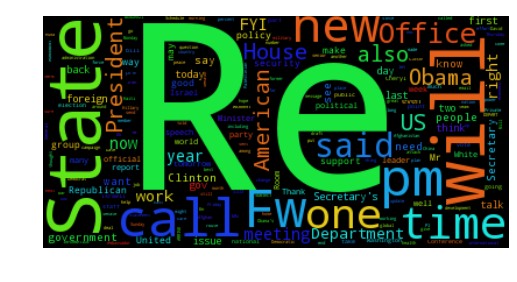

In [11]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together)
plt.imshow(wordcloud)
plt.axis("off")

We can already see a few bad things with word cloud. It has picked up "Re" and "Fw" from the subjects, it has huge precence of not very meaninful verbs like "will" or "said"

### 1.2 Second Cloud - Pre-processing pipeline & NLTK

Now we implement our text pre-processing pipeline:

In [13]:
#Tokenization
tokens = nltk.word_tokenize(all_together)

To stopwords we include some of the email typical ones

In [14]:
#Stopword removal
from nltk.corpus import stopwords
Stop = set(stopwords.words('english'))
extraStop = set(('re','fw','pm','am',"n't"))
finalStop = Stop.union(extraStop)

new_tokens = list()
for token in tokens:
    if token.lower() not in finalStop:
        new_tokens.append(token.lower())

We decided not to use stemming and use lemanization instead, which makes more sense in generating word clouds

In [15]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in new_tokens]

In [16]:
all_together2 = ' '.join(lemanized)

(-0.5, 399.5, 199.5, -0.5)

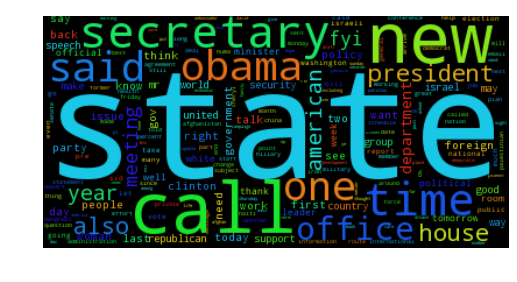

In [21]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together2)
plt.imshow(wordcloud)
plt.axis("off")

The new final result looks much better. As we removed the articles and prepositions.  

## Assignment 2 - Sentiment by Country

We loop across all the emails and inside across all the countries. If a match if found, sentiment analysis is computed with NLTK and it is added to a dataframe that keeps track of the cummulative result.

In [22]:
import pycountry
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

### Inspiration from:
### https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries

In [23]:
for country in pycountry.countries:
    print(country.name + " " + country.alpha_2)

Aruba AW
Afghanistan AF
Angola AO
Anguilla AI
Åland Islands AX
Albania AL
Andorra AD
United Arab Emirates AE
Argentina AR
Armenia AM
American Samoa AS
Antarctica AQ
French Southern Territories TF
Antigua and Barbuda AG
Australia AU
Austria AT
Azerbaijan AZ
Burundi BI
Belgium BE
Benin BJ
Bonaire, Sint Eustatius and Saba BQ
Burkina Faso BF
Bangladesh BD
Bulgaria BG
Bahrain BH
Bahamas BS
Bosnia and Herzegovina BA
Saint Barthélemy BL
Belarus BY
Belize BZ
Bermuda BM
Bolivia, Plurinational State of BO
Brazil BR
Barbados BB
Brunei Darussalam BN
Bhutan BT
Bouvet Island BV
Botswana BW
Central African Republic CF
Canada CA
Cocos (Keeling) Islands CC
Switzerland CH
Chile CL
China CN
Côte d'Ivoire CI
Cameroon CM
Congo, The Democratic Republic of the CD
Congo CG
Cook Islands CK
Colombia CO
Comoros KM
Cabo Verde CV
Costa Rica CR
Cuba CU
Curaçao CW
Christmas Island CX
Cayman Islands KY
Cyprus CY
Czechia CZ
Germany DE
Djibouti DJ
Dominica DM
Denmark DK
Dominican Republic DO
Algeria DZ
Ecuador EC
Egypt

We notice that some countries come in a form "name, extension" (like: "Iran, Islamic Republic of"). We will use this to broaden our search. Also Syria is listed as **Syrian Arab Republic** which is less likely to show up in the mails. Hence we add Syria to the list of countries.

We have enteries for the cumulative positive and negative sentiment in entire email corpus. Also the frequency with which each country appears in positive or negative context

In [24]:
#Creating the DataFrame
extras = [['Syria','SY'], ['North Korea','KR'], ['South Korea','KP']]
remove = [['Korea, Republic of','KR'], ["Korea, Democratic People's Republic of",'KP']]
country_list  = list([[i.name,i.alpha_2] for i in pycountry.countries])

[country_list.remove(name) for name in remove]

country_list = country_list +  extras
country_name = np.array(country_list)[:,0]
df_countries = pd.DataFrame(country_name,columns=['Country']).set_index('Country')
df_countries['Positive'] = 0.0
df_countries['Negative'] = 0.0
df_countries['PosFrequency'] = 0
df_countries['NegFrequency'] = 0


We use pycountry lib for getting the list of the country names. Different search terms are used. Extras list created above for few countries which are more likely to be referred in the some way than what is given by the lib is also used

In [25]:
def get_countries(body):
   
    exception = ['RE','TO','NO','AM','PM', 'VA', 'LA', 'FM', 'MP'] #abbreviation which can cause conflicts with the terms used in email.
    
    countries = []
    for country in country_list:

        if ' ' + country[0] + ' ' in body: #search by exact name
            countries.append(country[0])
        elif ' ' + country[0].lower() + ' ' in body: #search by exact name in lower case
            countries.append(country[0])
        elif ' ' + country[0].split(',',1)[0] + ' ' in body: #search by first name 
            countries.append(country[0])            
        elif ' ' + country[0].lower().split(',',1)[0] + ' ' in body: #search by first name in lower case
            countries.append(country[0])
        elif country[1] not in exception and ' ' + country[1] + ' '  in body:  #search by abbreviation
            countries.append(country[0])

    return countries

Function to update sentiments in the table. We also keep frequency of the country appearance in the mail

In [26]:
def update_feeling(scompound,df_countries,name):
    if scompound > 0.0:
        column = ['Positive', 'PosFrequency']
    else:
        column = ['Negative', 'NegFrequency']
        
    sc_old = df_countries.ix[name, column[0]]
    freq = df_countries.ix[name, column[1]]
    sc_new = sc_old + scompound
    
    df_countries2 = df_countries.set_value(name, column[0], sc_new)
    df_countries2 = df_countries.set_value(name, column[1], freq + 1)

    return df_countries2

In [28]:
def process_sentiment_table(df_countries,fthreshold):
    interesting_countries = df_countries[df_countries.apply(lambda x:
                                                            x['PosFrequency'] > fthreshold or  x['NegFrequency'] > fthreshold, axis=1)]


    avg_pos_sentiment_countries = interesting_countries.apply(lambda x: x['Positive'] / x['PosFrequency'] , axis = 1)
    avg_neg_sentiment_countries = interesting_countries.apply(lambda x: x['Negative'] / x['NegFrequency'] , axis = 1)
    avg_sentiment = avg_pos_sentiment_countries + avg_neg_sentiment_countries
    frequency = interesting_countries['PosFrequency'] + interesting_countries['NegFrequency']

    avg_sentiment_countries = pd.concat([ avg_sentiment, frequency, avg_pos_sentiment_countries, avg_neg_sentiment_countries, interesting_countries.PosFrequency, 
                                         interesting_countries.NegFrequency],axis=1)
    avg_sentiment_countries.columns = ['Avg_Sentiment', 'Frequency', 'Avg_Pos_Sentiment','Avg_Neg_Sentiment','PosFrequency', 'NegFrequency']
    return avg_sentiment_countries


Perform line by line sentiment analysis and search for the country name. The table is updated with positive or negative sentiment and frequency.

In [29]:
for indx, email in enumerate(body):
    if indx%100 == 0:
        print("Processed {}% of emails".format(round(100*indx/len(body))))
    for line in nltk.sent_tokenize(email):
        scompound = sid.polarity_scores(line)['compound']
        df_countries = update_feeling(scompound,df_countries,get_countries(line))
            
df_countries

Processed 0% of emails
Processed 1% of emails
Processed 3% of emails
Processed 4% of emails
Processed 6% of emails
Processed 7% of emails
Processed 9% of emails
Processed 10% of emails
Processed 12% of emails
Processed 13% of emails
Processed 15% of emails
Processed 16% of emails
Processed 18% of emails
Processed 19% of emails
Processed 21% of emails
Processed 22% of emails
Processed 24% of emails
Processed 25% of emails
Processed 27% of emails
Processed 28% of emails
Processed 30% of emails
Processed 31% of emails
Processed 33% of emails
Processed 34% of emails
Processed 36% of emails
Processed 37% of emails
Processed 39% of emails
Processed 40% of emails
Processed 42% of emails
Processed 43% of emails
Processed 44% of emails
Processed 46% of emails
Processed 47% of emails
Processed 49% of emails
Processed 50% of emails
Processed 52% of emails
Processed 53% of emails
Processed 55% of emails
Processed 56% of emails
Processed 58% of emails
Processed 59% of emails
Processed 61% of emails

,Positive,Negative,PosFrequency,NegFrequency
Country,,,,
Aruba,0.0000,0.0000,0,0
Afghanistan,34.7516,-28.4649,70,90
Angola,0.2257,0.0000,2,2
Anguilla,0.0000,-0.0516,0,1
Åland Islands,0.0000,0.0000,0,0
Albania,0.6633,0.0000,1,2
Andorra,0.0000,0.0000,0,0
United Arab Emirates,0.4215,0.0000,1,0
Argentina,2.8982,-0.4731,5,3


In [30]:
with open('sentiment_by_country_vader.pickle', 'wb') as handle:
    pickle.dump(df_countries, handle)

**Note**: As we had processed sentiments line by line hence the result may vary. The red color signifies Negative polarity and green positive. Most of the countries are near neutral region again may be due the way we calculate the sentiments

In [35]:
import nltk.sentiment.util as sentiment_liu_hu
from io import StringIO
import sys


mapping = {'Positive\n':1.0,'Negative\n':-1.0,'Neutral\n':0.0}

for indx, email in enumerate(body):
    if indx%100 == 0:
        print("Processed {}% of emails".format(round(100*indx/len(body))))
    for line in nltk.sent_tokenize(email):
        old_stdout = sys.stdout
        sys.stdout = mystdout = StringIO()
    
        sentiment_liu_hu.demo_liu_hu_lexicon(line)
        sys.stdout = old_stdout
        
        scompound = mapping[mystdout.getvalue()]
        df_countries = update_feeling(scompound,df_countries,get_countries(line))
        

df_countries

Processed 0% of emails


KeyboardInterrupt: 

### 2.1 Viz by Country

In [39]:

fthreshold = 5
avg_sentiment_countries = process_sentiment_table(df_countries,fthreshold)

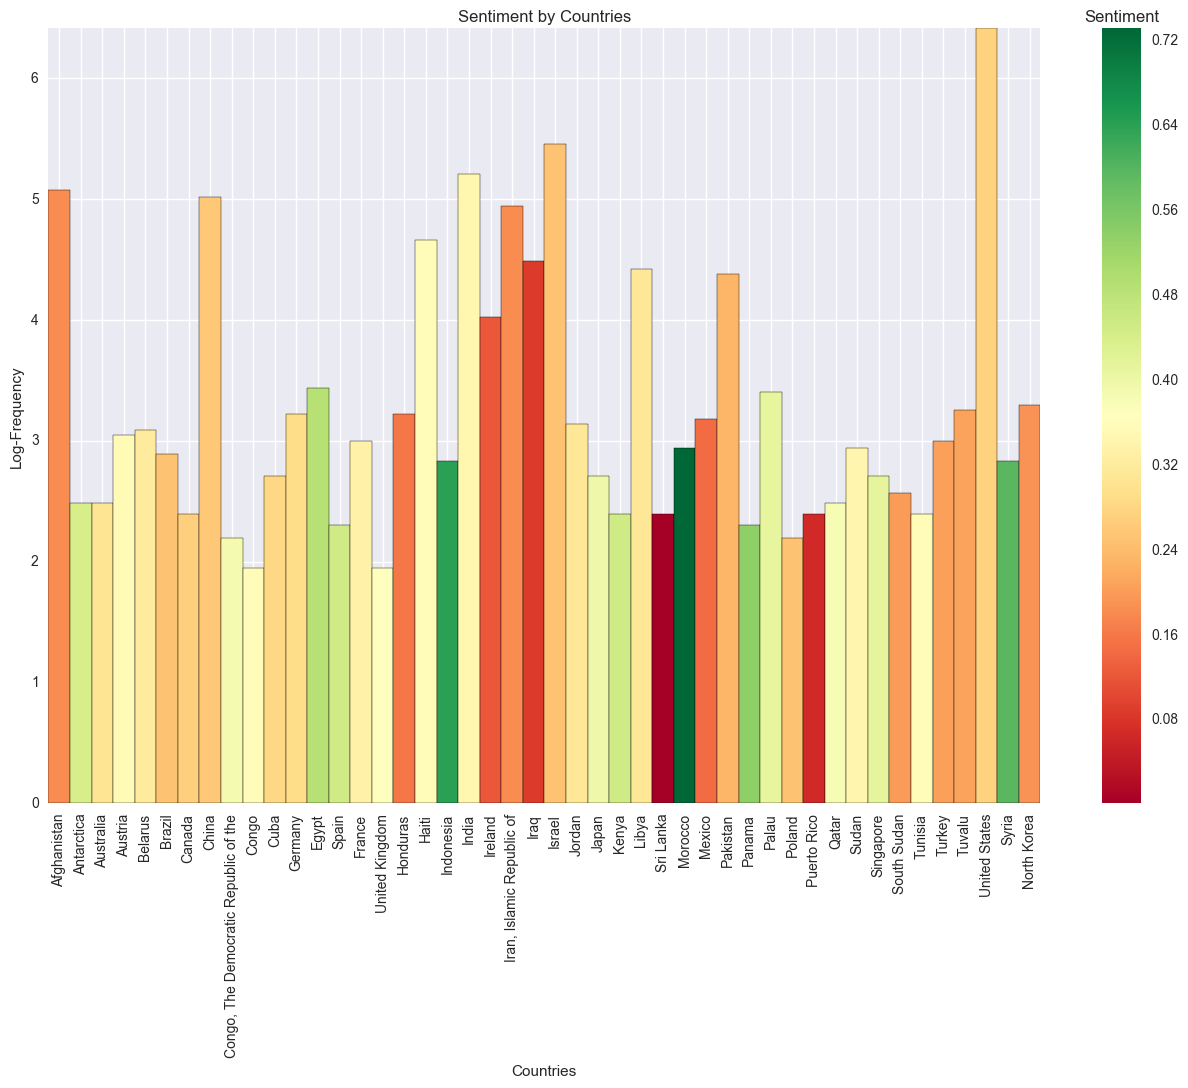

In [40]:
sentiment = np.array(avg_sentiment_countries['Avg_Sentiment'])
colors = plt.cm.RdYlGn(sentiment / float(max(sentiment)))
plt.figure(figsize=(16,10))
plot = plt.scatter(sentiment, sentiment, c=sentiment, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")



plt.bar(range(avg_sentiment_countries.shape[0]),np.log(avg_sentiment_countries['Frequency']),1.0,align='center',color = colors)
plt.xticks(range(avg_sentiment_countries.shape[0]), avg_sentiment_countries.index, rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Log-Frequency')
plt.title('Sentiment by Countries')
plt.axis('tight')
plt.margins(0.05, 0)

## Assignment 3 - Topic Modeling

In this section, we run topic modeling over the corpus in order to determine the important content in the corpus. The library 'gensim' is used to perform this task.

In [23]:
from gensim import corpora, models

/Users/vidit/anaconda3/envs/python35/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


We begin by pre-processing the text. Pre-processing involves tokenization, removal of stop words,

In [25]:
# Removing numbers
import re
body = [re.sub(r'\d+', '', t) for t in body]

In [26]:
# Tokenization
tokens = [nltk.word_tokenize(doc) for doc in body]
emails = nltk.Text(tokens)

In [27]:
# Stop words removal
# [TODO: use regular expression to remove punctuation]
extra_stop = set(("fw","pm","n't","''", ",",":","...",".",";","<",">","@","[","]","(",")","-","--","//","``","h","\'s","#","?","\'","%","!"))
stops = set(stopwords.words('english')).union(extra_stop)
#filtered_text = [word for word in text if str(word).lower() not in stops]
filtered_text = [[word for word in email if str(word).lower() not in stops] for email in emails]

We then discard words which occur only once, since these words do not play major role in topic modeling. Also remove single letter words which are result of tokenisation.

In [ ]:
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in filtered_text:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1 and len(token) != 1] for text in filtered_text]

For this task, we consider text in each email as a single document. Since emails may involve very short sentenences, it makes sense to discard such extremely short emails.

In [ ]:
min_length = 10
long_texts = [text for text in texts if len(text)>=10]

We then build a dictionary of all the words occuring in all the emails. A vector representation of each document is then generated.

In [ ]:
dictionary = corpora.Dictionary(long_texts)

In [ ]:
corpus = [dictionary.doc2bow(long_text) for long_text in long_texts]

At this stage, dictionary contains the list of all words, each word with an unique integer id. 'corpus' contains for each document a bag of words representation (the number of occurrences of each word).

We vary the parameter 'number of topics' and try to determine the best value for it based on the topics returned. Based on the results, we believe '__' is an appropriate choice for the number of topics, since including more topics results in the same words being repeated across different topics.

In [ ]:
num_topics = 15
model = models.LdaModel(corpus, num_topics, id2word=dictionary)
model.print_topics()

## Communities


In this section, we attempt to determine the communities present in the email corpus. 

In [ ]:
import community
import networkx as nx
import matplotlib.pyplot as plt

We start by building a communication graph between senders and recievers of each email. In order to accomplish this, we use the files 'Emails.csv' (SenderPersonId) and 'EmailReceivers.csv' (PersonId) and perform an inner join on the 'Id' attribute.

In [ ]:
df1 = pd.read_csv('hillary-clinton-emails/Emails.csv', index_col='Id')
df1 = df1[df1['SenderPersonId']==df1['SenderPersonId']]

In [ ]:
df2 = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv', index_col='Id')
df_network = pd.concat([df1, df2], axis=1, join="inner")
df_network[['SenderPersonId', 'PersonId']].head()

The list of values of ('SenderPersonId','PersonId') will form the edge of the graph.

In [ ]:
edges = list(zip(df_network['SenderPersonId'],df_network['PersonId']))
G = nx.Graph()
G.add_edges_from(edges)

We then determine the best partition using the best_partition (using Louvain algorithm) method of community module

In [ ]:
#compute the best partition
partition = community.best_partition(G)

In [ ]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

## *BONUS!*